<a href="https://colab.research.google.com/github/Braafisch/KI-Aufgaben/blob/main/aufgabe_4/aufgabe_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Berlin was geht ab!")

Berlin was geht ab!


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv

# 1 House Price Model
Fit a linear regression model to predict house prices with the data shown in the lecture:

age area  |  prize (K EUR)
-------------------|------------------
10, 150       | 300 
15, 120       | 200 
10, 100       | 250


Use your model to predict the price of a house of age 12 years and area 120 square meters.

1. First you should try to build a model using Numpy commands only. To invert a matrix, you can use
the function np.linalg.inv.
2. Now use the machine learning library sklearn. Import the class LinearRegression from the
linear_model subpackage (see below). Check out the documentation (API) of the class, it contains
a small example.

In [ ]:
X = np.array([[1,10,150],[1,15,120],[1,10,100]])
y = np.array([300,200,250])

th = inv(X.T @ X) @ X.T @ y
x_test = np.array([1,12,120])
print(th@x_test)

X = np.array([[10,150],[15,120],[10,100]])
model = LinearRegression()
model.fit(X,y)
print(model.predict(np.array([12,120],ndmin=2)))

242.00000000000068
[242.]


In [ ]:
np.array([[12,120]]).shape

(1, 2)

# 2 Polynomial Features and Ridge Regression
In this exercise we explore multivariate polynomial basis expansion using the class PolynomialFeatures
in the package sklearn.preprocessing (read the docs).
1. Generate data using sklearn.datasets.make_friedman2 (highly non-linear regression problem):
Use the default parameter and create n = 200 samples. Use the function train_test_split in the
package sklearn.model_selection to split the data in a training and a validation set (75% for
training and 25% for validation).
2. Fit several models on the training data: first a ridge regression model and, then, ridge regression
models where you apply the PolynomialFeatures class (with different degrees, ranging from 2
to 5) as a preprocessing step. All regression models should be instances of the class Ridge in
sklearn.linear_model and should use the default parameters. In order to efficiently implement
the preprocessing steps, check out the hint below.
3. Compare the models using the validation set to measure the mean square error (MSE) of both
models. Which one performs better?
4. Now generate more data with make_friedman2 (this is the test data) and evaluate the models
with respect to the MSE on this data. Does the measured error coincide with the results on the
validation set?

#### Hint
Sklearn offers so called pipelines, which allows you to combine several preprocessing steps and the final
estimator into one object. Here is an example, using a sklearn.preprocessing.StandardScaler and
the function sklearn.pipeline.make_pipeline to build the pipeline.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_friedman2
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

In [3]:
np.random.seed(10)

X, y = make_friedman2(n_samples=200)
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.75)

In [11]:
res = list()

for d in range(1,15):
  pipe = make_pipeline(PolynomialFeatures(degree=d),
                       StandardScaler(),
                       Ridge()).fit(X_train, y_train)
  res.append({"degree": d,
              "mse_train": mean_squared_error(y_train, pipe.predict(X_train)),
              "mse_val": mean_squared_error(y_val,pipe.predict(X_val)),
              })
  
res = pd.DataFrame(res)

res.head()

,degree,mse_train,mse_val
0,1,21677.866968,17773.706663
1,2,80.380438,132.804228
2,3,130.334660,199.157239
3,4,104.417655,191.825649
4,5,70.775860,147.223217


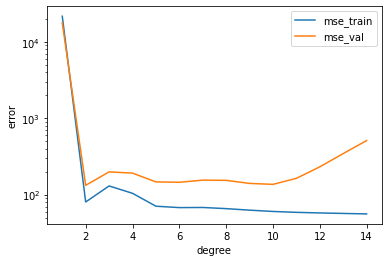

In [12]:
for col in ['mse_train', 'mse_val']:
  plt.plot(res['degree'], res[col], label=col)
plt.yscale("log")
plt.ylabel('error')
plt.xlabel('degree')
plt.legend()

In [14]:
print(res.sort_values('mse_val').head())

   degree  mse_train     mse_val
1       2  80.380438  132.804228
9      10  60.431013  136.785484
8       9  62.837575  140.693564
5       6  67.871202  145.596768
4       5  70.775860  147.223217


In [17]:
def evaluate(n=10, degree=2):
  res = np.zeros(n)
  for i in range(n):
    X_test, y_test = make_friedman2(n_samples=200)
    pipe = make_pipeline(PolynomialFeatures(degree=d),
                       StandardScaler(),
                       Ridge()).fit(X_train, y_train)
    res[i] = mean_squared_error(pipe.predict(X_test), y_test)

  return res

mse_val = evaluate(100)
print(f"MSE mean: {mse_val.mean()}")
print(f"MSE stdev: {mse_val.std()}")

MSE mean: 1291.5340045645937
MSE stdev: 573.9009750299108
